<a href="https://colab.research.google.com/github/sbylash/23_Shasia-Sasa_ML/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM 1**

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

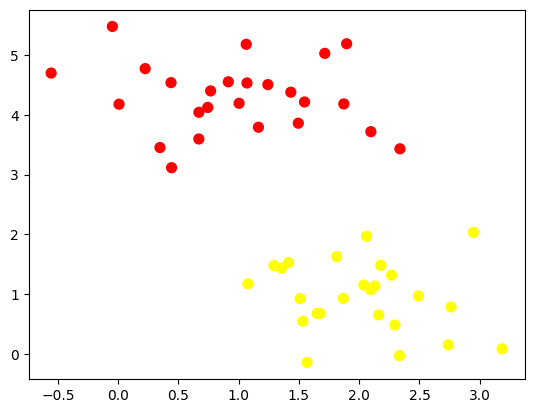

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

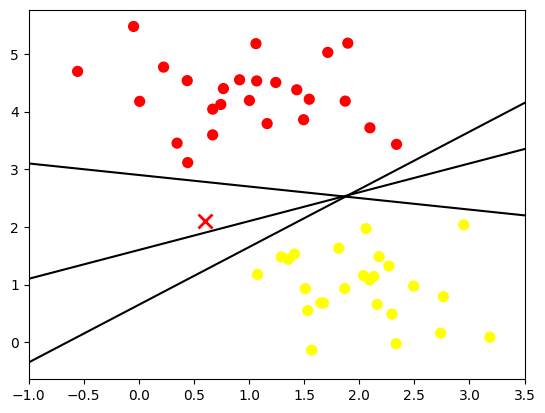

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

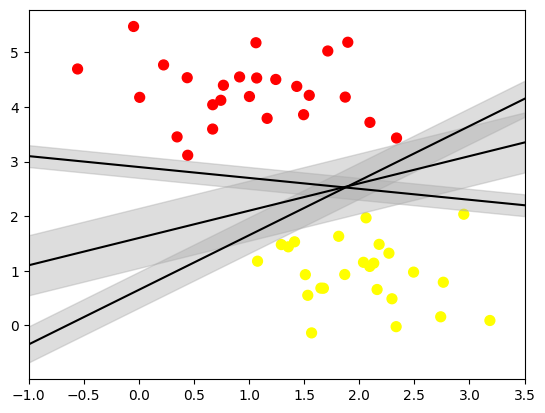

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [ ]:
# FITTING

from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
SVC(C=10000000000.0, kernel='linear')

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

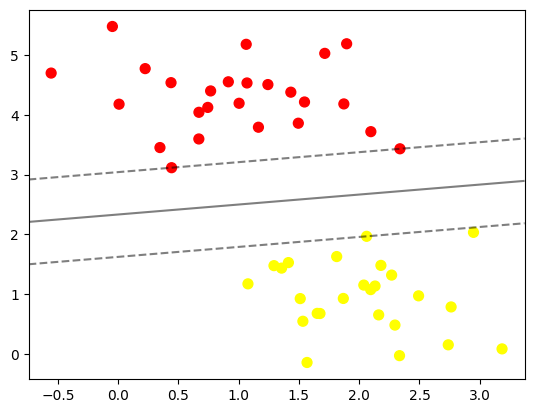

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [ ]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

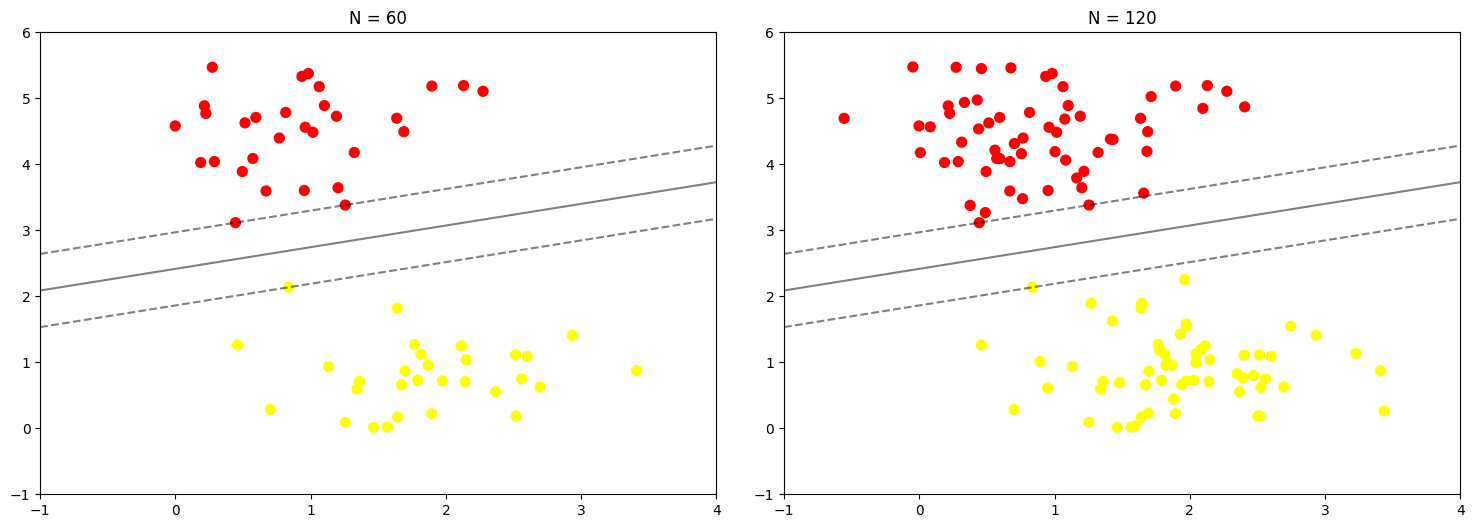

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

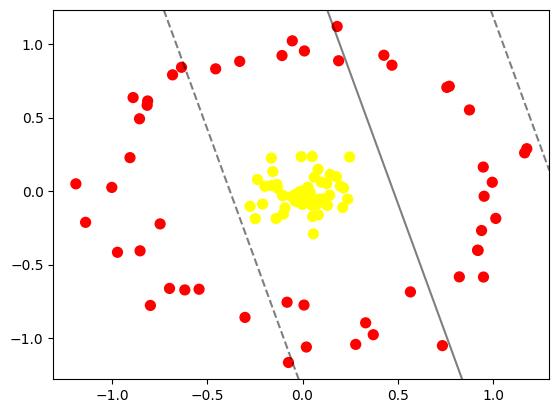

In [ ]:
# DATA TIDAK TERPISAH SECARA LINIER

# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 4.97473099e-02, -9.73812403e-02],
       [ 7.69726337e-01,  7.12585795e-01],
       [-7.46845955e-01, -2.23041647e-01],
       [ 8.76581774e-02, -5.53469172e-02],
       [ 3.25615159e-02, -6.13088369e-02],
       [ 1.97897871e-01,  3.39996580e-02],
       [ 9.52489772e-01, -3.51469553e-02],
       [ 2.11245639e-01, -1.11714357e-01],
       [ 9.17925434e-01, -4.01974454e-01],
       [ 2.47450686e-01,  2.31646560e-01],
       [-3.80719832e-02, -2.34274743e-02],
       [ 1.81701079e-01,  1.11878102e+00],
       [ 8.15818187e-02,  1.48298228e-01],
       [ 5.66010305e-01, -6.85327288e-01],
       [-1.18861702e+00,  4.92868031e-02],
       [ 1.42232435e-01, -2.77185227e-02],
       [-1.07515244e-01,  9.21243522e-01],
       [ 1.44598208e-01,  1.12562206e-01],
       [-8.88612085e-01,  6.35662499e-01],
       [-3.78152156e-02, -6.87738151e-02],
       [-1.33574748e-01,  4.47481702e-02],
       [-1.63455541e-01,  2.24241795e-01],
       [ 1.30535352e-01, -9.72234770e-02],
       [-9.70564419e-01, -4.15998709e-01],
       [ 7.57089649e-01,  7.04720826e-01],
       [-1.00023300e+00,  2.49074708e-02],
       [ 2.79251425e-02,  2.58512172e-02],
       [-2.75013543e-01, -1.03668940e-01],
       [-6.17295944e-01, -6.71807848e-01],
       [-7.02027226e-03,  2.33890117e-01],
       [-1.63706867e-01,  3.71821003e-02],
       [-1.00440275e-01, -1.55354334e-01],
       [-8.14831410e-01,  5.83333343e-01],
       [-7.37159991e-02, -1.16494550e+00],
       [ 3.71070361e-01, -9.76154125e-01],
       [ 5.07404385e-02,  2.34839827e-01],
       [-2.36304840e-01,  7.89943403e-02],
       [ 4.69054525e-01,  8.55764757e-01],
       [-6.34555573e-01,  8.41369496e-01],
       [-5.36419459e-02,  1.02111280e+00],
       [-2.47795912e-01, -1.87726055e-01],
       [ 9.81711577e-02,  6.11937410e-02],
       [-5.66190001e-02, -3.70380009e-02],
       [-1.11689692e-02, -5.18931859e-02],
       [ 2.01742597e-02, -1.05982384e+00],
       [ 4.03382539e-02, -1.14912197e-02],
       [ 7.75719853e-03, -7.74558606e-01],
       [-1.06122232e-01, -2.68622653e-02],
       [-5.90075016e-03, -1.62943813e-03],
       [ 5.31503591e-02, -1.73016018e-01],
       [-8.09839092e-02, -7.55411677e-01],
       [ 2.36752372e-01, -5.41304497e-02],
       [-5.42600324e-01, -6.66994486e-01],
       [ 1.01379269e+00, -1.85764591e-01],
       [ 1.89355448e-01,  8.85761748e-01],
       [ 2.79031506e-01, -1.04206502e+00],
       [-6.81622312e-01,  7.90061383e-01],
       [ 9.39124796e-01, -2.68049137e-01],
       [-3.01667795e-01, -8.58549491e-01],
       [ 1.96147319e-02, -5.05321055e-02],
       [-1.13775749e+00, -2.12386629e-01],
       [-1.32461918e-01,  2.07747636e-02],
       [-8.12185162e-01,  6.12541329e-01],
       [ 1.06111244e-01, -5.42476466e-02],
       [-9.04767580e-01,  2.27275867e-01],
       [-7.97841463e-01, -7.77231326e-01],
       [-1.38367135e-01, -1.86528427e-01],
       [ 1.17638578e+00,  2.88174431e-01],
       [-3.29386913e-01,  8.81534803e-01],
       [-8.51977809e-01, -4.06054847e-01],
       [-2.14594042e-02, -7.33276187e-02],
       [ 1.77115216e-01,  9.81270885e-02],
       [ 1.16506425e+00,  2.59753366e-01],
       [ 8.25356005e-02, -1.61714250e-01],
       [ 8.22474570e-01, -5.83104464e-01],
       [ 9.49182219e-01, -5.84262685e-01],
       [ 1.26873965e-01,  5.07666962e-02],
       [-2.81435472e-02, -3.80180014e-02],
       [ 4.26726672e-01,  9.23312474e-01],
       [-9.20059494e-02, -1.14445590e-01],
       [-1.97310906e-01,  3.28733230e-02],
       [ 7.33787884e-01, -1.05033882e+00],
       [ 5.68586687e-02, -2.90870964e-01],
       [ 7.69887940e-02, -8.79381772e-02],
       [ 8.75714887e-01,  5.51586536e-01],
       [ 2.15279593e-01,  2.17203253e-02],
       [-1.02902848e-01, -3.18039519e-02],
       [ 6.20695408e-02,  9.41215635e-02],
       [ 9.95360732e-01,  5.99807022e-02],
       [-1.55826642e-01,  1.32745077e-01],
       [-8.54884514e-01,  4.91449119e-01],
       [ 3.31142872e-01, -8.95436619e-01

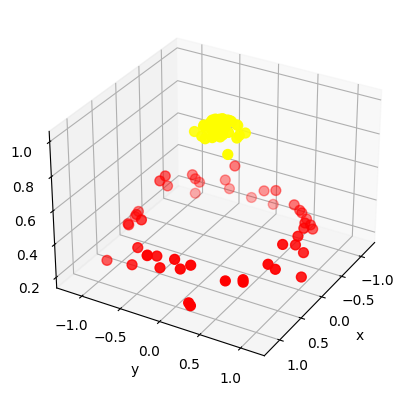

In [ ]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

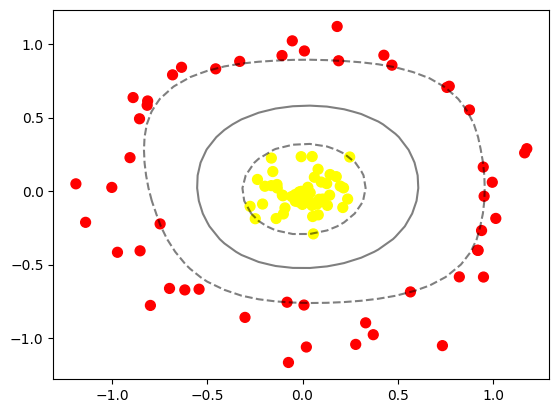

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

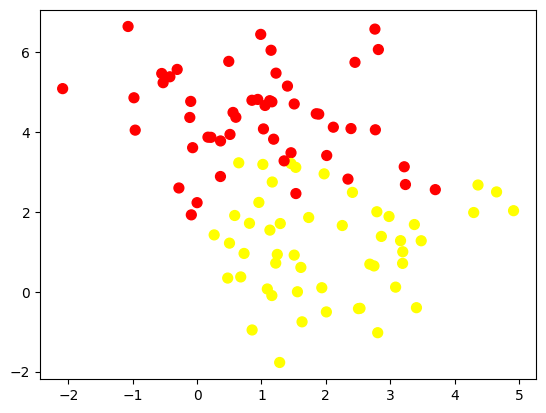

In [ ]:
# DATA OVERLAP

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

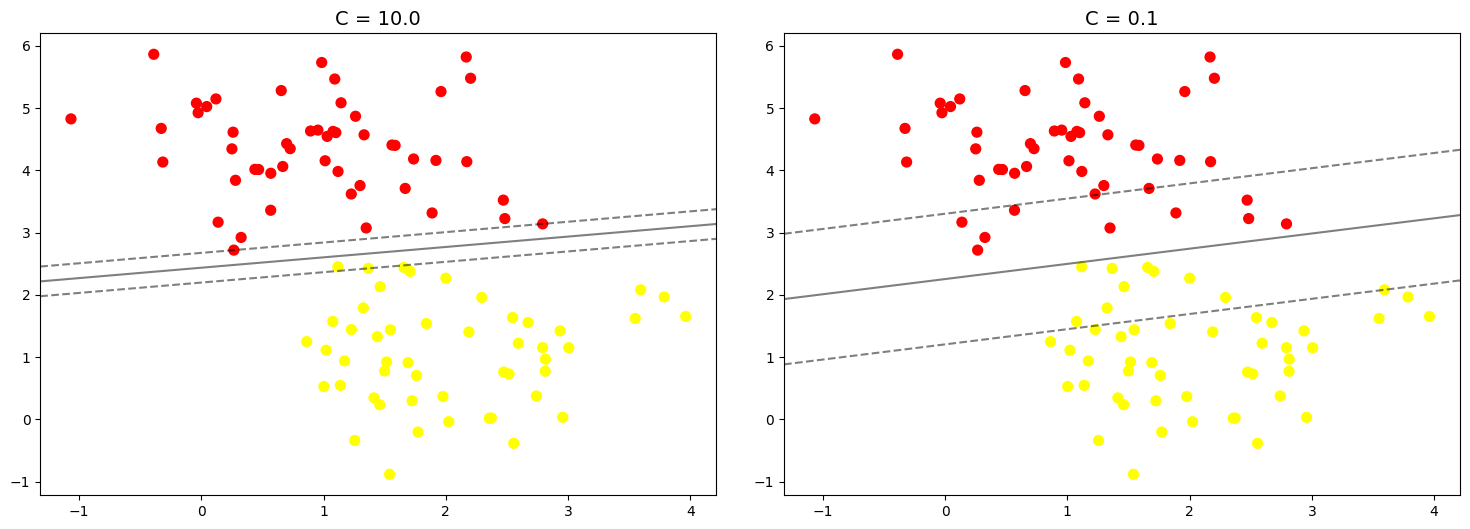

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

**PRAKTIKUM 2**

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


In [ ]:
type(faces)

sklearn.utils._bunch.Bunch

In [ ]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [ ]:
faces.data

array([[0.53464055, 0.5254902 , 0.49673203, ..., 0.00653595, 0.00653595,
        0.00261438],
       [0.28627452, 0.20784314, 0.2522876 , ..., 0.96993464, 0.9490196 ,
        0.9346406 ],
       [0.31895426, 0.39215687, 0.275817  , ..., 0.4261438 , 0.7908497 ,
        0.9555555 ],
       ...,
       [0.11633987, 0.11111111, 0.10196079, ..., 0.5686274 , 0.5803922 ,
        0.5542484 ],
       [0.19346406, 0.21176471, 0.2901961 , ..., 0.6862745 , 0.654902  ,
        0.5908497 ],
       [0.12287582, 0.09803922, 0.10980392, ..., 0.12941177, 0.1633987 ,
        0.29150328]], dtype=float32)

In [ ]:
faces.data.shape

(1348, 2914)

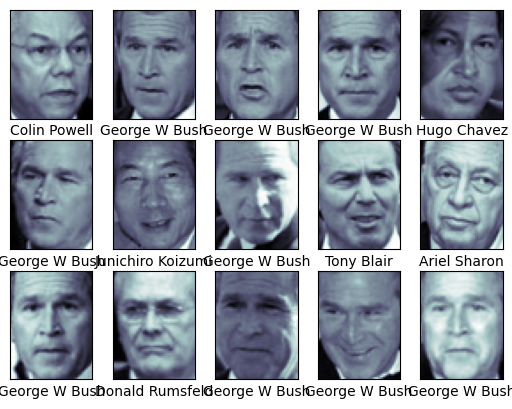

In [ ]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 36s, sys: 26.3 s, total: 2min 2s
Wall time: 1min 18s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [ ]:
# PREDIKSI LABEL UNTUK DATA TESTING

model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

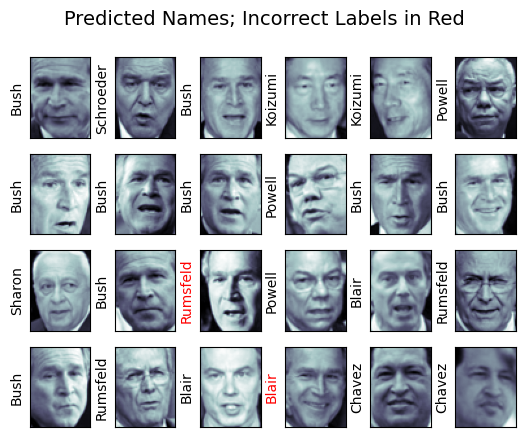

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

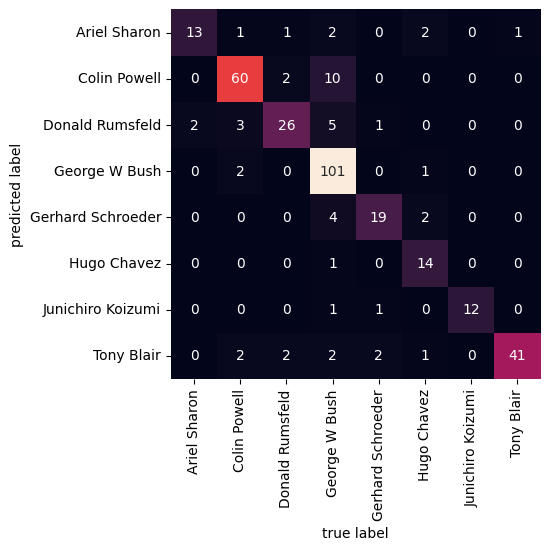

In [ ]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

**PRAKTIKUM 3**

In [ ]:
# MENDEFINISIKAN DATA DUMMY

import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[120  92]
 [176  94]
 [268 157]
 [247 148]
 [ 34  84]
 [  9  68]
 [200 129]
 [ 44  53]
 [192  54]
 [ 55  97]
 [107  97]
 [112 122]
 [ 68 103]
 [ 25 180]
 [163  51]
 [ 44 216]
 [191  67]
 [ 15 171]
 [171  80]
 [257  43]
 [ 63 132]
 [104 120]
 [ 99 109]
 [115  65]
 [137  63]
 [134  85]
 [ 92 106]
 [196  34]
 [277  60]
 [ 90  91]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [ ]:
# MEMBUAT DATA FRAME
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,120,92,0
1,176,94,0
2,268,157,0
3,247,148,0
4,34,84,0


In [ ]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,120,92,Kelas B
1,176,94,Kelas B
2,268,157,Kelas B
3,247,148,Kelas B
4,34,84,Kelas B


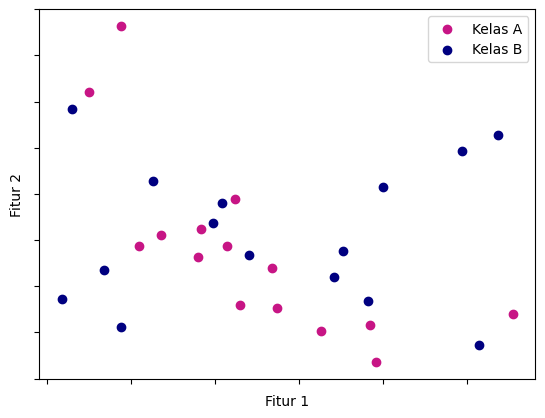

In [ ]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [ ]:
# KLASIFIKASI MULTINOMIAL NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5238095238095238
Hasil akurasi data test: 0.4444444444444444


In [ ]:
# KLASIFIKASI GAUSSIAN NAIVE BAYES

from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6666666666666666
Hasil akurasi data test (Gaussian): 0.4444444444444444


**PRAKTIKUM 5**

In [1]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [6]:
# Image directories
train_dir = "/content/drive/MyDrive/images/training"
test_dir = "/content/drive/MyDrive/images/test"

In [7]:
def load_dataset(img_dir):  # Mendefinisikan fungsi load_dataset dengan parameter img_dir
    p = Path(img_dir)  # Membuat objek Path dari img_dir
    dirs = p.glob('*')  # Mendapatkan semua subdirektori di dalam img_dir

    img_list = []  # Menginisialisasi list kosong untuk menyimpan pasangan gambar dan label

    for dir in dirs:  # Loop untuk setiap subdirektori
        label = str(dir).split('\\')[-1]  # Mengambil nama subdirektori sebagai label
        for file in dir.glob('*.jpg'):  # Loop untuk setiap file gambar dengan ekstensi .jpg
            img = mpimg.imread(file)  # Membaca gambar menggunakan mpimg.imread

            if not img is None:  # Memeriksa apakah gambar berhasil dibaca
                img_list.append((img, label))  # Menambahkan pasangan (gambar, label) ke dalam img_list

    return img_list  # Mengembalikan img_list yang berisi semua gambar dan label

In [8]:
# Load training data
train_img = load_dataset(train_dir)

In [9]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[ 8,  8, 20],
         [ 9,  9, 21],
         [ 8,  8, 18],
         ...,
         [12, 13,  8],
         [ 6, 13,  6],
         [ 0,  6,  0]],
 
        [[ 6,  6, 18],
         [ 9,  9, 21],
         [ 9,  9, 19],
         ...,
         [ 3,  4,  0],
         [ 0,  4,  0],
         [ 2, 12,  4]],
 
        [[19, 17, 30],
         [24, 22, 35],
         [24, 22, 33],
         ...,
         [ 8,  9,  4],
         [ 2,  9,  2],
         [ 6, 16,  8]],
 
        ...,
 
        [[24, 20, 21],
         [12,  8,  9],
         [17, 13, 12],
         ...,
         [ 0,  1,  0],
         [13, 15, 10],
         [ 9, 11,  6]],
 
        [[16, 12, 13],
         [ 8,  4,  5],
         [18, 14, 15],
         ...,
         [13, 14,  9],
         [33, 35, 30],
         [30, 32, 27]],
 
        [[17, 12, 16],
         [ 7,  3,  4],
         [15, 11, 12],
         ...,
         [ 8,  9,  4],
         [18, 20, 15],
         [ 4,  6,  1]]], dtype=uint8),
 '/content/drive/MyDrive/images/training/n

In [10]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 0
(737, 1024, 3)


In [11]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (737, 1024, 3)
Label	: /content/drive/MyDrive/images/training/night


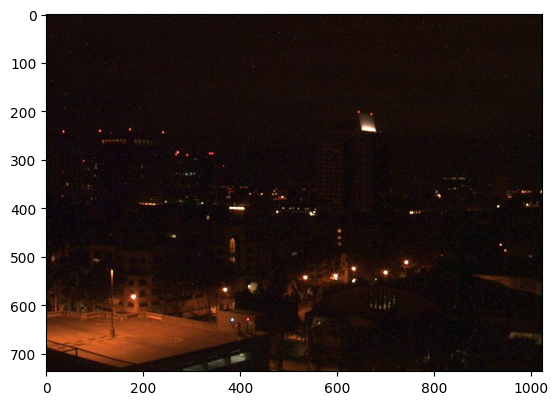

In [12]:
random_img_viz(train_img)

In [13]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [14]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [31]:
def preprocess(img_list):  # Mendefinisikan fungsi preprocess dengan parameter img_list
    std_img_list = []  # Menginisialisasi list kosong untuk menyimpan pasangan gambar dan label yang telah distandarisasi

    for item in img_list:  # Loop untuk setiap item dalam img_list
        image = item[0]  # Mengambil gambar dari item
        label = item[1]  # Mengambil label dari item

        # Standarized the image
        std_img = standarized_input(image)  # Menstandarisasi gambar menggunakan fungsi standarized_input

        # Create the label
        img_label = label_encoder(label)  # Mengenkode label menggunakan fungsi label_encoder

        std_img_list.append((std_img, img_label))  # Menambahkan pasangan (gambar yang distandarisasi, label yang dienkode) ke dalam std_img_list

    return std_img_list  # Mengembalikan std_img_list yang berisi semua gambar dan label yang telah diproses

In [32]:
train_std_img_list = preprocess(train_img)

In [33]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))  # Memilih nomor acak dari train_std_img_list

# Check img size
print(f'Image {pick_random}')  # Mencetak nomor gambar yang diakses
print(train_std_img_list[pick_random][0].shape)  # Mencetak ukuran gambar yang diakses

Image 4
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 0


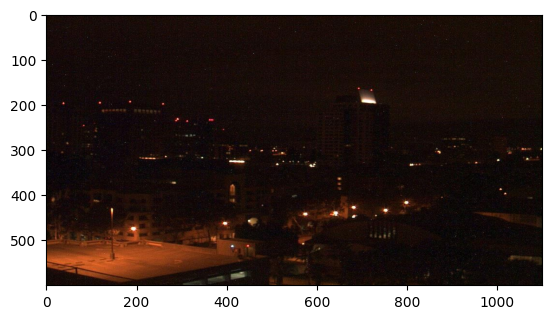

In [34]:
random_img_viz(train_std_img_list)

In [35]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):  # Mendefinisikan fungsi avg_brightness dengan parameter image
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)  # Mengkonversi gambar dari RGB ke HSV menggunakan OpenCV

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2])  # Menghitung jumlah total nilai kecerahan (V channel) dari gambar HSV
    area = image.shape[0] * image.shape[1]  # Menghitung luas area gambar (jumlah piksel)
    avg = sum_brightness / area  # Menghitung rata-rata kecerahan dengan membagi jumlah total kecerahan dengan luas area

    return avg  # Mengembalikan nilai rata-rata kecerahan

Image: 5
Avg Brighness: 25.6261


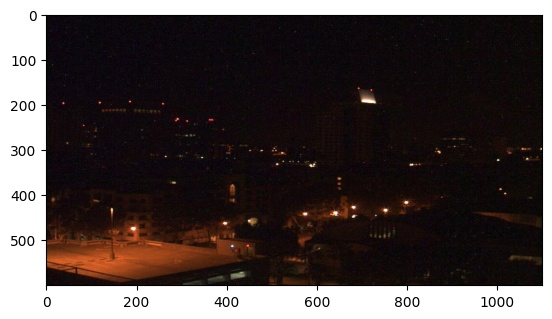

In [36]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))  # Memilih nomor acak dari train_std_img_list

feature_img = train_std_img_list[rand_img][0]  # Mengambil gambar dari train_std_img_list pada indeks rand_img

avg_img = avg_brightness(feature_img)  # Menghitung rata-rata kecerahan gambar menggunakan fungsi avg_brightness

print(f'Image: {rand_img}')  # Mencetak nomor gambar yang diakses
print(f'Avg Brighness: {avg_img:.4f}')  # Mencetak rata-rata kecerahan gambar dengan format 4 desimal
plt.imshow(feature_img)  # Menampilkan gambar menggunakan matplotlib

In [37]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 6
Actual label: 0
Predicted label: 0


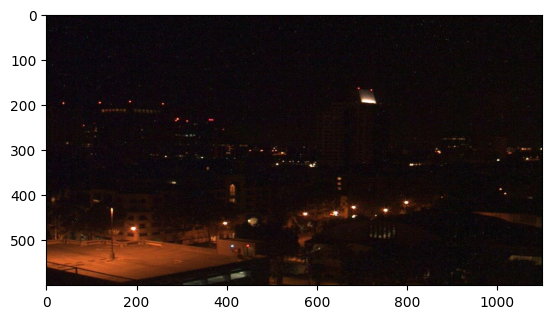

In [38]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))  # Memilih nomor acak dari train_std_img_list

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)  # Memprediksi label gambar menggunakan fungsi predict_label dengan threshold 120

# Evaluate
print(f'Image {rand_img}')  # Mencetak nomor gambar yang diakses
print(f'Actual label: {train_std_img_list[rand_img][1]}')  # Mencetak label asli dari gambar
print(f'Predicted label: {pred}')  # Mencetak label yang diprediksi
plt.imshow(train_std_img_list[rand_img][0])  # Menampilkan gambar menggunakan matplotlib

In [39]:
def evaluate(img_list, threshold):
    miss_labels = []  # Inisialisasi list kosong untuk menyimpan gambar yang salah prediksi

    for file in img_list:
        img = file[0]
        label = file[1]

        pred_label = predict_label(img, threshold)

        if pred_label != label:
           miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img
    print(f'Accuracy: {accuracy:.4f}')

In [40]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 1.0000


In [42]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Check if the image list is empty
if not test_std_img_list:
    print("Error: test_std_img_list is empty. Check data loading and preprocessing.")
else:
    # Predict
    evaluate(test_std_img_list, threshold=120)

Error: test_std_img_list is empty. Check data loading and preprocessing.


In [43]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [44]:
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (10, 2)


,AVG_BRIGHT,LABELS
0,25.678615,0.0
1,25.731924,0.0
2,25.805306,0.0
3,30.474629,0.0
4,33.761653,0.0


In [45]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (0, 2)


,AVG_BRIGHT,LABELS


In [48]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]

# Check the number of unique classes in y_train
if len(np.unique(y_train)) < 2:
    print(f"Error: y_train has only {len(np.unique(y_train))} class. Check data loading and preprocessing.")
else:
    X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
    y_test = test_avg_img.iloc[:,1]

    model = SVC()
    model.fit(X_train, y_train)

Error: y_train has only 1 class. Check data loading and preprocessing.


In [51]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]

# Check the number of unique classes in y_train
if len(np.unique(y_train)) < 2:
    print(f"Error: y_train has only {len(np.unique(y_train))} class. Check data loading and preprocessing.")
else:
    X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
    y_test = test_avg_img.iloc[:,1]

    model = SVC()

   y_train = pd.to_numeric(y_train)
    y_test = pd.to_numeric(y_test)

    model.fit(X_train, y_train)

Error: y_train has only 1 class. Check data loading and preprocessing.


**TUGAS 2**

In [52]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [54]:
# Direktori gambar
train_dir = "/content/drive/MyDrive/images/training"
test_dir = "/content/drive/MyDrive/images/test"

In [55]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('\\')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [56]:
# Load training data
train_img = load_dataset(train_dir)

# Load test data
test_img = load_dataset(test_dir)

In [57]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [58]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [59]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [60]:
train_std_img_list = preprocess(train_img)
test_std_img_list = preprocess(test_img)

In [61]:
def brightness_histogram(image, bins=256, range=(0, 256)):

    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Extract the V channel (brightness)
    brightness = img_hsv[:, :, 2]

    # Calculate histogram for the V channel
    hist = cv2.calcHist([brightness], [0], None, [bins], range)

    # Normalize the histogram
    hist = hist / hist.sum()

    return hist

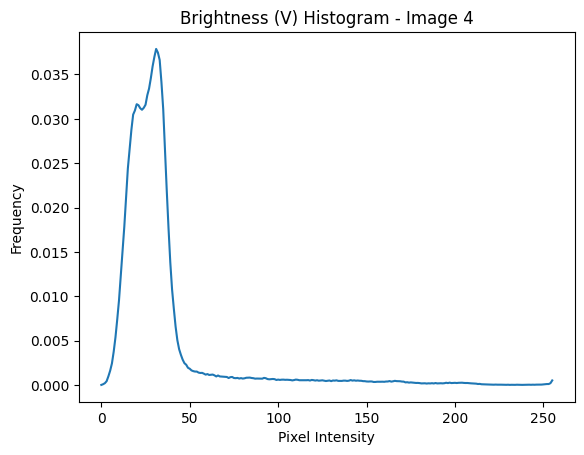

In [62]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

brightness_histogram_img = brightness_histogram(feature_img)

plt.plot(brightness_histogram_img)
plt.title(f"Brightness (V) Histogram - Image {rand_img}")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

In [77]:
def extract_brightness_histogram_feature(img_list):
    hist_list = []  # List to store brightness histograms of each image
    labels = []  # List to store labels of each image

    for img in img_list:
        img_hist = brightness_histogram(img[0])
        img_label = img[1]

        hist_list.append(img_hist.flatten())
        labels.append(img_label)

    # Check if hist_list is not empty before creating the array
    if hist_list:
        # Stack data in columnar way
        hist_array = np.array(hist_list)

        # Ensure labels are not all the same value
        if len(np.unique(labels)) < 2:
            print("Warning: All labels are the same. Check your data and labeling process.")

        data = np.column_stack((hist_array, labels))

        # Create a Pandas dataframe
        column_names = [f'Bin_{i}' for i in range(hist_array.shape[1])] + ['LABELS']
        df = pd.DataFrame(data, columns=column_names)

        return df
    else:
        # Handle the case of empty img_list
        return pd.DataFrame() # Return an empty dataframe

In [78]:
# Extract feature on train data
train_hist_img = extract_brightness_histogram_feature(train_std_img_list)
print(f'Shape: {train_hist_img.shape}')
train_hist_img.head()

Shape: (10, 257)


,Bin_0,Bin_1,Bin_2,Bin_3,Bin_4,Bin_5,Bin_6,Bin_7,Bin_8,Bin_9,...,Bin_247,Bin_248,Bin_249,Bin_250,Bin_251,Bin_252,Bin_253,Bin_254,Bin_255,LABELS
0,0.000041,0.000239,0.000686,0.001474,0.003327,0.005959,0.009382,0.014711,0.021252,0.028942,...,0.000029,0.000015,0.000039,0.000059,0.000045,0.000085,0.000094,0.000133,0.000382,0.0
1,0.000027,0.000258,0.000779,0.001800,0.003459,0.006664,0.010267,0.015455,0.022198,0.029367,...,0.000032,0.000024,0.000039,0.000056,0.000048,0.000067,0.000077,0.000156,0.000409,0.0
2,0.000011,0.000276,0.000664,0.001476,0.002998,0.005789,0.009047,0.014026,0.019895,0.027517,...,0.000029,0.000036,0.000052,0.000039,0.000048,0.000073,0.000083,0.000153,0.000376,0.0
3,0.000020,0.000158,0.000362,0.000729,0.001485,0.002405,0.003541,0.005167,0.007467,0.009720,...,0.000029,0.000041,0.000045,0.000068,0.000071,0.000092,0.000121,0.000192,0.000479,0.0
4,0.000008,0.000086,0.000203,0.000429,0.000979,0.001614,0.002433,0.003758,0.005376,0.007391,...,0.000038,0.000038,0.000045,0.000065,0.000080,0.000108,0.000108,0.000205,0.000515,0.0


In [79]:
# Extract feature on test data
test_hist_img = extract_brightness_histogram_feature(test_std_img_list)
if len(test_std_img_list) > 0: # Check to see if the list is empty
    print(f'Shape: {test_hist_img.shape}')
    test_hist_img.head()
else:
    print("The test_std_img_list is empty. Please add image data to the list")

The test_std_img_list is empty. Please add image data to the list


In [80]:
# Extract feature on test data
test_hist_img = extract_brightness_histogram_feature(test_std_img_list)
if len(test_std_img_list) > 0: # Check to see if the list is empty
    print(f'Shape: {test_hist_img.shape}')
    test_hist_img.head()
else:
    print("The test_std_img_list is empty. Please add image data to the list")
    # Create a dummy DataFrame with the correct columns if test_std_img_list is empty
    test_hist_img = pd.DataFrame(columns=[f'Bin_{i}' for i in range(256)] + ['LABELS']) # Assuming 256 bins from train_hist_img

The test_std_img_list is empty. Please add image data to the list


In [82]:
# Assuming 'train_hist_img' is your DataFrame with 256 features + labels
# Separate features (X) and labels (y)
X = train_hist_img.drop('LABELS', axis=1)  # Features are all columns except 'LABELS'
y = train_hist_img['LABELS']  # Labels are in the 'LABELS' column

# Split data into training and testing sets (adjust test_size as needed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can fit your model with the correctly formatted data
model.fit(X_train, y_train)

ValueError: The number of classes has to be greater than one; got 1 class